In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import poisson
%matplotlib inline
warnings.filterwarnings('ignore')
from openpyxl import workbook,load_workbook
from openpyxl.workbook.workbook import Workbook
primary_list = []

In [2]:
class Node:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data=data

    def insert(self, data):
        if self.data:
            if data[0:7] < self.data[0:7]:
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
            elif data[0:7] > self.data[0:7]:
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data
    
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print( self.data)
        if self.right:
            self.right.PrintTree()

    def search(self, root, element):
        try:
            if root is None or root.data[0:7] == element[0:7]:
                return root.data
            elif (root.data[0:7] > element[0:7]):
                return self.search(root.left, element)
            elif (root.data[0:7] < element[0:7]):
                return self.search(root.right, element)
        except Exception as e:
            e="No such data exist !"
            return e

    def inorderTraversal(self, root):
        res = []
        if root:
            res = self.inorderTraversal(root.left)
            res.append(root.data)
            res = res + self.inorderTraversal(root.right)
        return res
    
    def minValueNode(self,root):
        current = root
        while (current.left is not None):
            current = current.left
        return current

    def deleteNode(self,root,key):
        if root is None:
            return root
        if (key[0:7] < root.data[0:7]):
            root.left = self.deleteNode(root.left,key)
        elif (key[0:7] > root.data[0:7]):
            root.right = self.deleteNode(root.right,key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp=root.left
                root=None
                return temp
            temp = self.minValueNode(root.right)
            root.data=temp.data
            root.right=self.deleteNode(root.right ,temp.data)
        return root 

In [3]:
r=1
while r!=0:
    #node creation
    print("\n\n----------------Students Record DataBase----------------------")
    print("\n1. Insert Students Detail")
    print("\n2. Display Students Details")
    print("\n3. Delete Students Details")
    print("\n4. Search Students Details")
    print("\n5. save as excel")
    print("\n6. Exit")
    print("--------------------------------------------------------------")
    op = int(input("\n\nEnter your Choice : "))
    if op ==1:
        root = Node("2032007    Balaji          100       90       95")
        root.insert("2032002    Akshay          90        99       95")
        root.insert("2032006    Avudai          100       90       95")
        root.insert("2032004    Anbu            100       90       95")
        root.insert("2032041    Sri             90        99       88")
        root.insert("2032042    Sripathy        100       190       95")
        root.insert("2032047    Theeraj         100       90       85")
        n=int(input("\n\nEnter How many Students details to be inserted : "))
        for i in range(1,n+1):
          str=input("\n\nEnter the details of the student : ")
          root.insert(str)
    elif op == 2:
        print("\n\nDisplay Options ")
        print("\n1.Print the sorted Tree")
        print("\n2.Print inoder Traversal")
        ch = int(input("\nEnter your choice : "))
        if ch == 1:
            print("\n---------------------------------------------------------------")
            print("Rollno     Student Name    Sub1      Sub2     Sub3")
            root.PrintTree()
            print("---------------------------------------------------------------\n")
        elif ch == 2:
            print(root.inorderTraversal(root))

    elif op == 3:
        print("\n\nDeletion in Students record ")
        n=int(input("\nEnter how many Students number to be deleted : "))
        for i in range(1,n+1):
          str=input("\nEnter the Roll No of the student to be deleted:")
          root.deleteNode(root,str)
        print("\nAfter deletion Modified Binary tree is :")
        print("-------------------------------------------------------------------")
        print("Rollno     Student Name    Sub1      Sub2     Sub3")
        root.PrintTree()
        print("-------------------------------------------------------------------\n")
    elif op == 4:
        print("\n\nSearch Students Detail ")
        str=input("\nEnter the students Roll No : ")
        print(root.search(root,str))
    
    elif op == 5:
        temp_list=[]
        wb = Workbook()
        ws = wb.active
        ws.title = "Dataset"
        ws.append(['Roll_no','Names','Mark1','Mark2','Mark3'])
        for i in range(0,len(root.inorderTraversal(root))):
            temp_list.append(root.inorderTraversal(root).pop(i))
        for i in range(len(temp_list)):
            primary_list.append(temp_list.pop())
            x = primary_list.pop()
            y = x.split()
            ws.append(y)
        wb.save('School Record.xlsx')
    elif op == 6:
        r=0
    else:
        print("\n Try again ")






----------------Students Record DataBase----------------------

1. Insert Students Detail

2. Display Students Details

3. Delete Students Details

4. Search Students Details

5. save as excel

6. Exit
--------------------------------------------------------------


Enter your Choice : 1


Enter How many Students details to be inserted : 1


Enter the details of the student : 2032051    Yazhini         100       90       85


----------------Students Record DataBase----------------------

1. Insert Students Detail

2. Display Students Details

3. Delete Students Details

4. Search Students Details

5. save as excel

6. Exit
--------------------------------------------------------------


Enter your Choice : 2


Display Options 

1.Print the sorted Tree

2.Print inoder Traversal

Enter your choice : 1

---------------------------------------------------------------
Rollno     Student Name    Sub1      Sub2     Sub3
2032002    Akshay          90        99       95
2032004    Anbu      

In [33]:
df = pd.read_excel ('School Record.xlsx')
df.head()

,Roll_no,Names,Mark1,Mark2,Mark3
0,2032051,Yazhini,100,90,85
1,2032047,Theeraj,100,90,85
2,2032042,Sripathy,100,90,95
3,2032041,Sri,90,99,88
4,2032007,Balaji,100,90,95


In [34]:
# statistical info
df.describe()

,Roll_no,Mark1,Mark2,Mark3
count,8.000000e+00,8.0000,8.00000,8.00000
mean,2.032025e+06,97.5000,92.25000,91.62500
std,2.190890e+01,4.6291,4.16619,4.74906
min,2.032002e+06,90.0000,90.00000,85.00000
25%,2.032006e+06,97.5000,90.00000,87.25000
50%,2.032024e+06,100.0000,90.00000,95.00000
75%,2.032043e+06,100.0000,92.25000,95.00000
max,2.032051e+06,100.0000,99.00000,95.00000


In [35]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Roll_no  8 non-null      int64 
 1   Names    8 non-null      object
 2   Mark1    8 non-null      int64 
 3   Mark2    8 non-null      int64 
 4   Mark3    8 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 448.0+ bytes


<AxesSubplot:xlabel='Mark1', ylabel='count'>

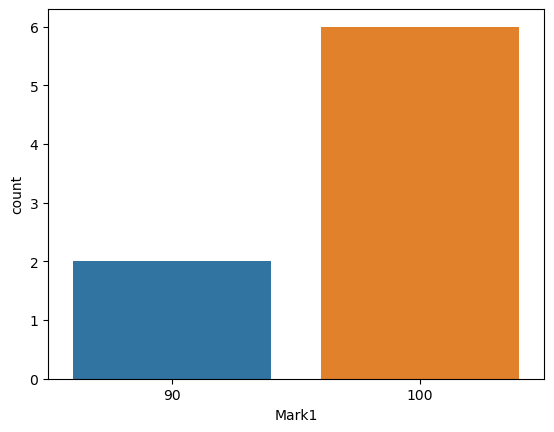

In [36]:
sns.countplot(df["Mark1"])

<AxesSubplot:xlabel='Mark2', ylabel='Density'>

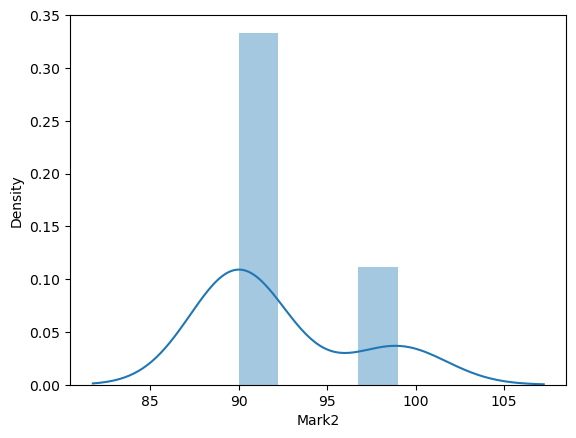

In [37]:
sns.distplot(df['Mark2'])

<AxesSubplot:xlabel='Mark3', ylabel='Density'>

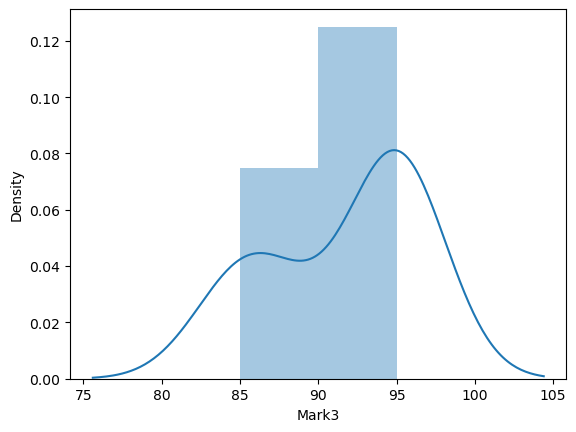

In [38]:
sns.distplot(df['Mark3'])

<AxesSubplot:>

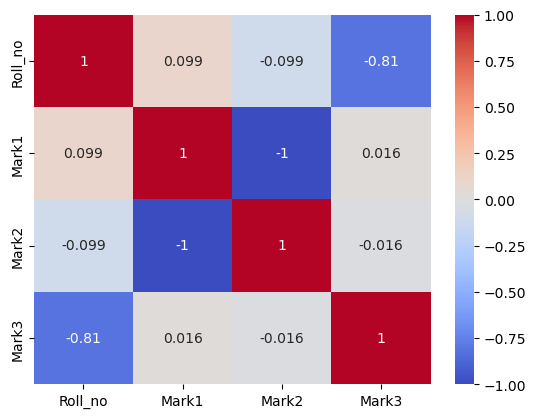

In [39]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [40]:
s=df.iloc[0:9,2]
print(s)

0    100
1    100
2    100
3     90
4    100
5    100
6    100
7     90
Name: Mark1, dtype: int64


In [41]:
a1=s.mean()
a1

97.5

In [42]:
s1=df.iloc[0:9,3]
print(s1)

0    90
1    90
2    90
3    99
4    90
5    90
6    90
7    99
Name: Mark2, dtype: int64


In [43]:
a2=s1.mean()
a2

92.25

In [44]:
s2=df.iloc[0:9,4]
print(s2)

0    85
1    85
2    95
3    88
4    95
5    95
6    95
7    95
Name: Mark3, dtype: int64


In [45]:
a3=s2.mean()
a3

91.625

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

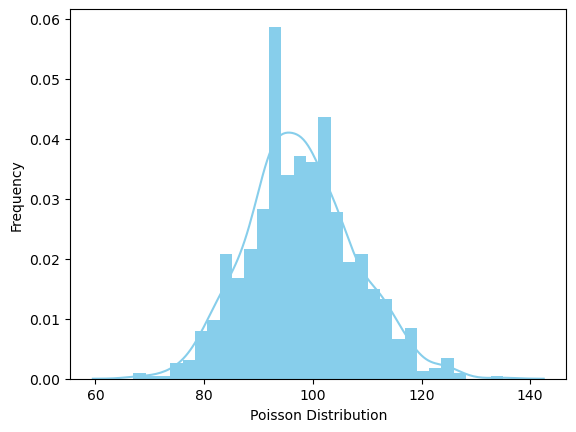

In [46]:
data_poisson = poisson.rvs(mu=a1, size=1000)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

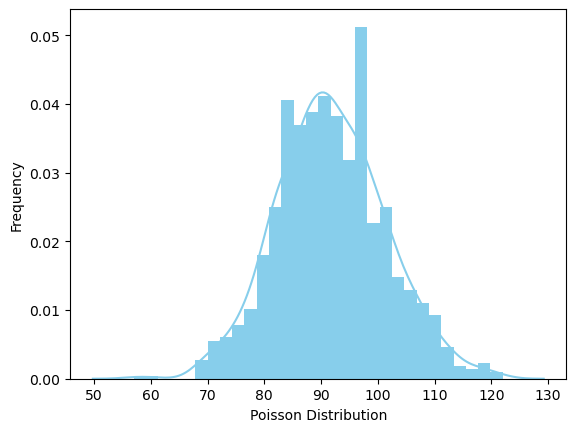

In [47]:
data_poisson = poisson.rvs(mu=a2, size=1000)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

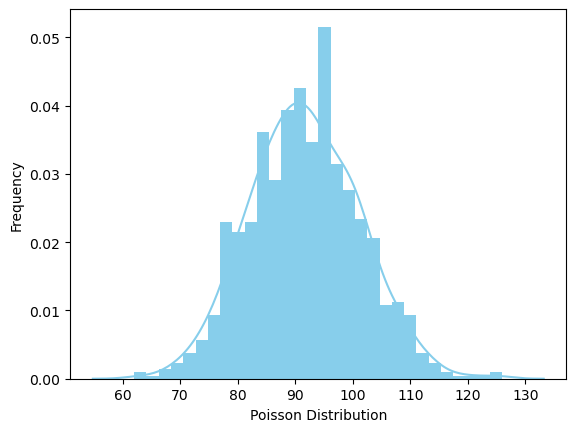

In [48]:
data_poisson = poisson.rvs(mu=a3, size=1000)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [49]:
X = df.drop(columns=['Roll_no','Names','Mark1','Mark3'])
y = df['Mark2']

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print(pred)
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

[90. 90. 90. 99. 90. 90. 90. 99.]
Model Report
MSE: 0.0
CV Score: 0.0


<AxesSubplot:title={'center':'Model Coefficients'}>

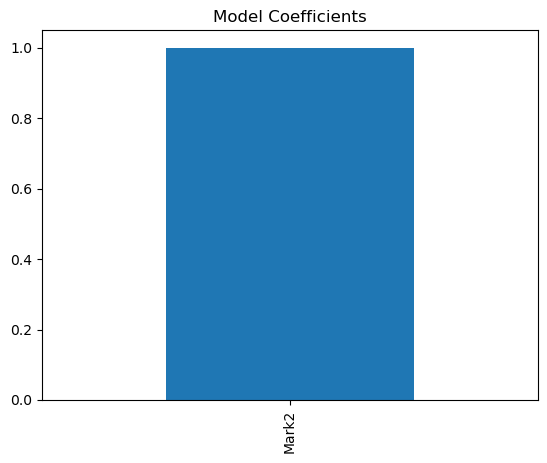

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [52]:
df = pd.read_excel ('School Record.xlsx')
print(df)

   Roll_no     Names  Mark1  Mark2  Mark3
0  2032051   Yazhini    100     90     85
1  2032047   Theeraj    100     90     85
2  2032042  Sripathy    100     90     95
3  2032041       Sri     90     99     88
4  2032007    Balaji    100     90     95
5  2032006    Avudai    100     90     95
6  2032004      Anbu    100     90     95
7  2032002    Akshay     90     99     95


In [53]:
w=df.iloc[0:9,2:5]
print(w)


   Mark1  Mark2  Mark3
0    100     90     85
1    100     90     85
2    100     90     95
3     90     99     88
4    100     90     95
5    100     90     95
6    100     90     95
7     90     99     95


In [54]:
w.mean()

Mark1    97.500
Mark2    92.250
Mark3    91.625
dtype: float64

In [55]:
totalmarks=91.444444+90.222222+92.555556
tm=totalmarks/3
print(tm)

91.40740733333332


In [56]:
Year=[2019,2020]
Total_Sale=[89.3562222,91.40740733333332]
sale1= pd.DataFrame(Year, index =[1,2],columns =['Year'])
sale2=pd.DataFrame(Total_Sale, index =[1,2],columns =['Total_Sale'])
regressor = LinearRegression()
regressor.fit(sale1,sale2)
#regression intercept
print(regressor.intercept_)

[-4051.986562]


In [57]:
print(regressor.coef_)

[[2.05118513]]


In [58]:
y=((regressor.coef_*2021)+regressor.intercept_)
y

array([[93.45859247]])

In [59]:
y=((regressor.coef_*2021)+regressor.intercept_,(regressor.coef_*2022)+regressor.intercept_,(regressor.coef_*2023)+regressor.intercept_,(regressor.coef_*2024)+regressor.intercept_,(regressor.coef_*2025)+regressor.intercept_,(regressor.coef_*2026)+regressor.intercept_,(regressor.coef_*2027)+regressor.intercept_,(regressor.coef_*2028)+regressor.intercept_,(regressor.coef_*2029)+regressor.intercept_)
y

(array([[93.45859247]]),
 array([[95.5097776]]),
 array([[97.56096273]]),
 array([[99.61214787]]),
 array([[101.663333]]),
 array([[103.71451813]]),
 array([[105.76570327]]),
 array([[107.8168884]]),
 array([[109.86807353]]))

In [60]:
Predicted_Years=[2021,2022,2023,2024,2025,2026,2027,2028,2029]
Predicted_Sales=[20909975,23228825,25547675,27866525,30185375,32504225,34823075,37141925,39460775]
data_dict={'Predicted_Sales':pd.Series(Predicted_Sales)}
data_dict1={'Predicted_Years':pd.Series(Predicted_Years),'Predicted_Sales':pd.Series(Predicted_Sales)}
dframe=pd.DataFrame(data_dict)
dframe1=pd.DataFrame(data_dict1)
dframe1

,Predicted_Years,Predicted_Sales
0,2021,20909975
1,2022,23228825
2,2023,25547675
3,2024,27866525
4,2025,30185375
5,2026,32504225
6,2027,34823075
7,2028,37141925
8,2029,39460775


Text(0.5, 0, 'Predicted_Months')

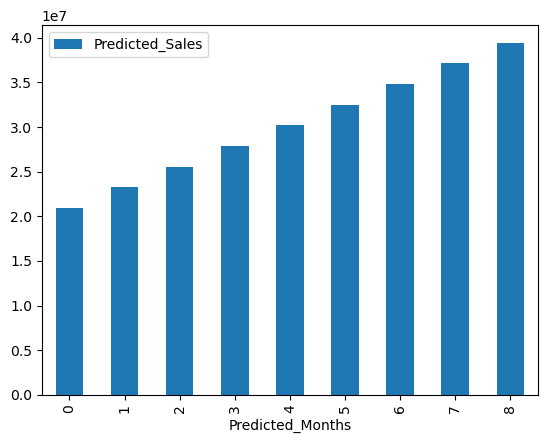

In [61]:
dframe.plot.bar()
plt.xlabel("Predicted_Months")